In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from scipy import stats

In [3]:
co_vice_data = pd.read_csv('../Inputs/SALESInputs/CO_Alcohol_Sales.csv')
co_vice_data = co_vice_data[:-5]
co_vice_data = co_vice_data[['Year', 'Total Marijuana Sales', 'Alcohol Tax Collections', 'Gallons of Alcohol Consumed', 'Packs of Cigarettes taxed', 'Cigarette Tax Collections', 'Tobacco Products Collections', 'Avg. Tax Per Pack']]
co_vice_data

,Year,Total Marijuana Sales,Alcohol Tax Collections,Gallons of Alcohol Consumed,Packs of Cigarettes taxed,Cigarette Tax Collections,Tobacco Products Collections,Avg. Tax Per Pack
0,2006.0,NaN,33216803.0,NaN,247700000.0,206131914.0,23075379.0,0.832184
1,2007.0,NaN,34394199.0,NaN,242900000.0,202089387.0,25573502.0,0.831986
2,2008.0,NaN,35471594.0,NaN,235400000.0,195867073.0,24831455.0,0.832061
3,2009.0,NaN,35971804.0,NaN,227400000.0,189191000.0,27974310.0,0.831974
4,2010.0,NaN,36208537.0,135824179.0,210200000.0,174863159.0,28200649.0,0.831889
5,2011.0,NaN,37014005.0,136778438.0,204400000.0,169875969.0,29165873.0,0.831096
6,2012.0,NaN,38817101.0,136489856.0,207700000.0,172806694.0,30591878.0,0.832001
7,2013.0,NaN,39863646.0,143468372.0,198900000.0,165468129.0,31558236.0,0.831916
8,2014.0,3.032397e+08,40886494.0,141184231.0,193000000.0,160674017.0,33474323.0,0.832508
9,2015.0,5.775363e+08,42074458.0,130031148.0,194000000.0,161564387.0,35452212.0,0.832806


In [4]:
co_vice_data['Year'] = co_vice_data['Year'].astype(str)
co_vice_data['Year'] = co_vice_data['Year'].astype(str).str[:-2]
co_vice_data

,Year,Total Marijuana Sales,Alcohol Tax Collections,Gallons of Alcohol Consumed,Packs of Cigarettes taxed,Cigarette Tax Collections,Tobacco Products Collections,Avg. Tax Per Pack
0,2006,NaN,33216803.0,NaN,247700000.0,206131914.0,23075379.0,0.832184
1,2007,NaN,34394199.0,NaN,242900000.0,202089387.0,25573502.0,0.831986
2,2008,NaN,35471594.0,NaN,235400000.0,195867073.0,24831455.0,0.832061
3,2009,NaN,35971804.0,NaN,227400000.0,189191000.0,27974310.0,0.831974
4,2010,NaN,36208537.0,135824179.0,210200000.0,174863159.0,28200649.0,0.831889
5,2011,NaN,37014005.0,136778438.0,204400000.0,169875969.0,29165873.0,0.831096
6,2012,NaN,38817101.0,136489856.0,207700000.0,172806694.0,30591878.0,0.832001
7,2013,NaN,39863646.0,143468372.0,198900000.0,165468129.0,31558236.0,0.831916
8,2014,3.032397e+08,40886494.0,141184231.0,193000000.0,160674017.0,33474323.0,0.832508
9,2015,5.775363e+08,42074458.0,130031148.0,194000000.0,161564387.0,35452212.0,0.832806


<IPython.core.display.Javascript object>


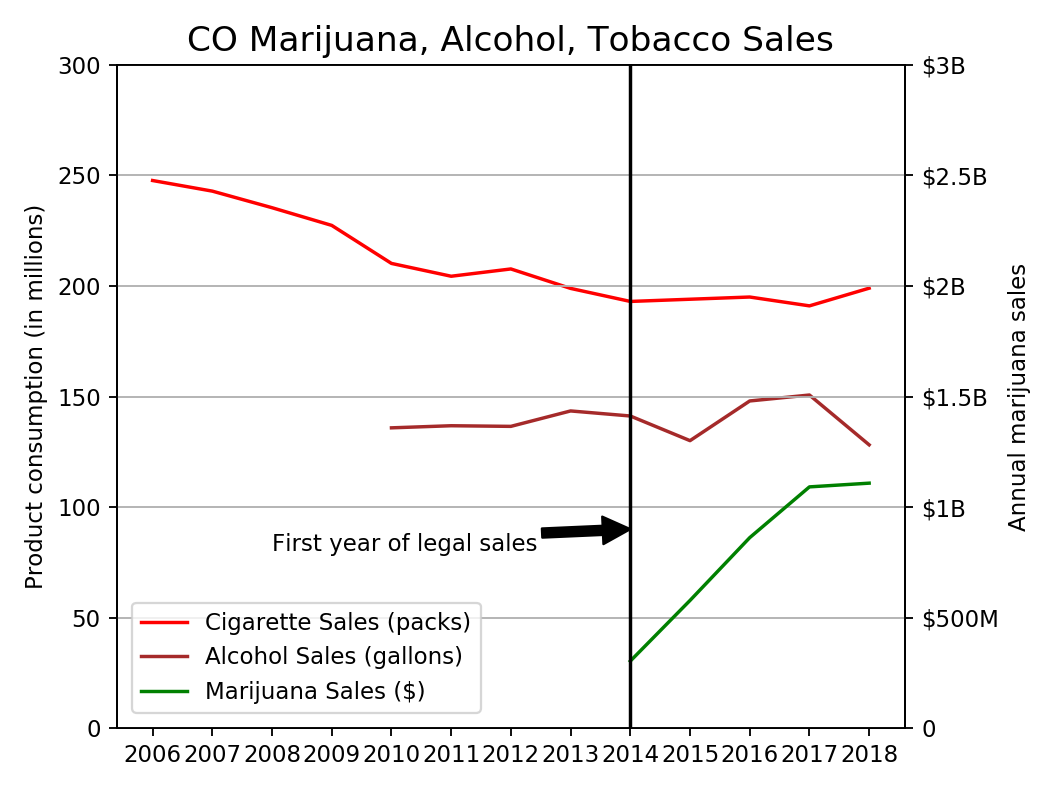

C:\Users\Jason\Anaconda\lib\site-packages\matplotlib\legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


In [20]:
fig1, ax1 = plt.subplots(sharex=True, sharey=True)

y1_labels = ['0', '50', '100', '150', '200', '250', '300']
y2_labels = ['0', '$500M', '$1B', '$1.5B', '$2B', '$2.5B', '$3B']

cigarette_plot = ax1.plot(co_vice_data['Year'], co_vice_data['Packs of Cigarettes taxed'], color="red", label="Cigarette Sales (packs)")
alcohol_plot = ax1.plot(co_vice_data['Year'], co_vice_data['Gallons of Alcohol Consumed'], color='brown', label='Alcohol Sales (gallons)')
ax1.set_ylabel('Product consumption (in millions)')
ax1.set_yticklabels(y1_labels)
plt.ylim(0, 300000000)

ax2 = ax1.twinx()
mj_plot = ax2.plot(co_vice_data['Year'], co_vice_data['Total Marijuana Sales'], color='green', label='Marijuana Sales')
ax2.set_ylabel('Annual marijuana sales')
ax2.set_yticklabels(y2_labels)
ax2.set_ylim(0, 3000000000)

plt.axvline(x=8,color='black')
ax1.annotate('First year of legal sales', xy=(8,90000000), xytext=(2,80000000), arrowprops=dict(facecolor='black', shrink=2.75))

line_labels = ["Cigarette Sales (packs)", "Alcohol Sales (gallons)", "Marijuana Sales ($)"]
fig1.legend([cigarette_plot, alcohol_plot, mj_plot], labels=line_labels, loc=(0.125,.1))

plt.title('CO Marijuana, Alcohol, Tobacco Sales', fontsize=15)
plt.tight_layout()
plt.show()

In [21]:
plt.grid()

In [22]:
plt.savefig('../SALES_Jason/co_vice_data.png')